In [1]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from gradboost import GradBoost
from BUTIF import BUTIF, Clustering
from rand_CART import Rand_CART
from segmentor import MSE, MeanSegmentor
from sklearn.linear_model import LogisticRegression
from HHCART import HouseHolderCART

from selector_methods import Selector

from sklearn.metrics import accuracy_score as accuracy
from pickle import load
from sklearn.cross_validation import train_test_split, KFold

from time import clock
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datasets = load(open('datasets.pkl', 'rb'))
data_name = []
for data_key, data in datasets.items():
    data_name.append(data_key)

In [4]:
data_name

['ionosphere',
 'throat surgery',
 'wisconsin breast cancer',
 'Indian liver',
 'credit approval',
 'Australian credit approval',
 'blood transfusion',
 'Pima Indians diabetes',
 'mammographic mass',
 'banknote authentication',
 'mushroom',
 'EEG Eye State',
 'adult',
 'bank marketing']

## BUTIF Gradient Boosting

#### ionosphere

In [3]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  6.13636364e-01   9.00000000e+02] accuracy test:  0.715909090909
max_leaf:  3 accuracy validation:  [  8.06818182e-01   9.48000000e+02] accuracy test:  0.829545454545
max_leaf:  5 accuracy validation:  [  8.52272727e-01   1.34000000e+03] accuracy test:  0.886363636364
max_leaf:  7 accuracy validation:  [  8.86363636e-01   2.31400000e+03] accuracy test:  0.886363636364
max_leaf:  10 accuracy validation:  [  8.63636364e-01   1.19300000e+03] accuracy test:  0.875
max_leaf:  15 accuracy validation:  [  8.75000000e-01   9.15000000e+02] accuracy test:  0.863636363636
time:  4630.609875


In [ ]:
np.save("BUTIF_1_cross_validation", (val_scores, best_scores, final_scores))

In [4]:
val_scores, best_scores, final_scores = np.load("BUTIF_1_cross_validation.npy")

#### throat surgery

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


In [ ]:
np.save("BUTIF_2_cross_validation", (val_scores, best_scores, final_scores))

In [8]:
val_scores, best_scores, final_scores = np.load("BUTIF_2_cross_validation.npy")

In [11]:
final_scores

array([ 0.83898305,  0.83898305,  0.83898305,  0.83898305,  0.83898305,
        0.83898305])

#### wisconsin breast cancer

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

In [ ]:
np.save("BUTIF_3_cross_validation", (val_scores, best_scores, final_scores))

In [12]:
val_scores, best_scores, final_scores = np.load("BUTIF_3_cross_validation.npy")

In [13]:
final_scores

array([ 0.90909091,  0.88811189,  0.95104895,  0.95804196,  0.95104895,
        0.93706294])

#### Indian liver

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

In [ ]:
np.save("BUTIF_4_cross_validation", (val_scores, best_scores, final_scores))

In [14]:
val_scores, best_scores, final_scores = np.load("BUTIF_4_cross_validation.npy")

In [15]:
final_scores

array([ 0.70344828,  0.70344828,  0.67586207,  0.67586207,  0.68965517,
        0.68965517])

#### credit approval

In [20]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  6.80981595e-01   1.02600000e+03] accuracy test:  0.689024390244
max_leaf:  3 accuracy validation:  [  7.91411043e-01   1.08900000e+03] accuracy test:  0.786585365854
max_leaf:  5 accuracy validation:  [  8.28220859e-01   9.85000000e+02] accuracy test:  0.835365853659
max_leaf:  7 accuracy validation:  [  8.28220859e-01   1.82700000e+03] accuracy test:  0.859756097561
max_leaf:  10 accuracy validation:  [  8.15950920e-01   9.44000000e+02] accuracy test:  0.829268292683
max_leaf:  15 accuracy validation:  [  8.28220859e-01   1.26200000e+03] accuracy test:  0.853658536585
time:  6568.790996


In [21]:
np.save("BUTIF_5_cross_validation", (val_scores, best_scores, final_scores))

In [16]:
val_scores, best_scores, final_scores = np.load("BUTIF_5_cross_validation.npy")

In [17]:
final_scores

array([ 0.70344828,  0.70344828,  0.68965517,  0.66896552,  0.66206897,
        0.65517241])

#### Australian credit approval

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

In [ ]:
np.save("BUTIF_6_cross_validation", (val_scores, best_scores, final_scores))

In [18]:
val_scores, best_scores, final_scores = np.load("BUTIF_6_cross_validation.npy")

In [19]:
final_scores

array([ 0.82080925,  0.86127168,  0.83815029,  0.84393064,  0.85549133,
        0.84971098])

#### blood transfusion

In [22]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  8.02139037e-01   9.01000000e+02] accuracy test:  0.75935828877
max_leaf:  3 accuracy validation:  [  8.23529412e-01   1.38200000e+03] accuracy test:  0.754010695187
max_leaf:  5 accuracy validation:  [  8.07486631e-01   1.68100000e+03] accuracy test:  0.770053475936
max_leaf:  7 accuracy validation:  [  8.18181818e-01   2.03100000e+03] accuracy test:  0.775401069519
max_leaf:  10 accuracy validation:  [  8.02139037e-01   9.03000000e+02] accuracy test:  0.786096256684
max_leaf:  15 accuracy validation:  [  7.91443850e-01   9.12000000e+02] accuracy test:  0.770053475936
time:  4109.796258


In [23]:
np.save("BUTIF_7_cross_validation", (val_scores, best_scores, final_scores))

#### Pima Indians diabetes

In [24]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  6.71875000e-01   1.63900000e+03] accuracy test:  0.6875
max_leaf:  3 accuracy validation:  [  6.82291667e-01   9.03000000e+02] accuracy test:  0.609375
max_leaf:  5 accuracy validation:  [  7.03125000e-01   1.24800000e+03] accuracy test:  0.703125
max_leaf:  7 accuracy validation:  [  6.97916667e-01   1.09200000e+03] accuracy test:  0.744791666667
max_leaf:  10 accuracy validation:  [  7.03125000e-01   9.09000000e+02] accuracy test:  0.755208333333
max_leaf:  15 accuracy validation:  [  7.13541667e-01   9.56000000e+02] accuracy test:  0.770833333333
time:  4438.399455000001


In [25]:
np.save("BUTIF_8_cross_validation", (val_scores, best_scores, final_scores))

#### mammographic mass

In [26]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 8:
        i += 1
        continue
    if i == 9:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  7.78846154e-01   9.10000000e+02] accuracy test:  0.75
max_leaf:  3 accuracy validation:  [  7.74038462e-01   9.01000000e+02] accuracy test:  0.769230769231
max_leaf:  5 accuracy validation:  [  7.88461538e-01   9.02000000e+02] accuracy test:  0.788461538462
max_leaf:  7 accuracy validation:  [  8.02884615e-01   1.10200000e+03] accuracy test:  0.802884615385
max_leaf:  10 accuracy validation:  [  7.93269231e-01   1.09300000e+03] accuracy test:  0.788461538462
max_leaf:  15 accuracy validation:  [  7.93269231e-01   9.63000000e+02] accuracy test:  0.783653846154
time:  6755.393080000002


In [27]:
np.save("BUTIF_9_cross_validation", (val_scores, best_scores, final_scores))

#### banknote authentication

In [28]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 9:
        i += 1
        continue
    if i == 10:
        break
    X_train = data.X_train
    _, n_features = X_train.shape
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, penalty='l1'), 
                            task='regression'), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  5.24781341e-01   9.01000000e+02] accuracy test:  0.545189504373
max_leaf:  3 accuracy validation:  [  7.02623907e-01   1.78700000e+03] accuracy test:  0.696793002915
max_leaf:  5 accuracy validation:  [  9.24198251e-01   1.62300000e+03] accuracy test:  0.900874635569
max_leaf:  7 accuracy validation:  [  9.62099125e-01   3.00000000e+03] accuracy test:  0.950437317784
max_leaf:  10 accuracy validation:  [  1.00000000e+00   1.16800000e+03] accuracy test:  1.0
max_leaf:  15 accuracy validation:  [   1.  933.] accuracy test:  1.0
time:  5541.270236


In [29]:
np.save("BUTIF_10_cross_validation", (val_scores, best_scores, final_scores))

## Gradient Boosting

#### ionosphere

In [30]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [   0.90909091  909.        ] accuracy test:  0.909090909091
max_leaf:  3 accuracy validation:  [   0.92045455  901.        ] accuracy test:  0.863636363636
max_leaf:  5 accuracy validation:  [   0.93181818  901.        ] accuracy test:  0.863636363636
max_leaf:  7 accuracy validation:  [  8.06818182e-01   9.01000000e+02] accuracy test:  0.795454545455
max_leaf:  10 accuracy validation:  [   0.92045455  902.        ] accuracy test:  0.863636363636
max_leaf:  15 accuracy validation:  [  8.97727273e-01   9.01000000e+02] accuracy test:  0.852272727273
time:  42.18028100000083


In [31]:
np.save("gradboost_1_cross_validation", (val_scores, best_scores, final_scores))

#### throat surgery

In [32]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  7.43589744e-01   9.02000000e+02] accuracy test:  0.822033898305
max_leaf:  3 accuracy validation:  [  7.94871795e-01   9.03000000e+02] accuracy test:  0.805084745763
max_leaf:  5 accuracy validation:  [  7.60683761e-01   9.03000000e+02] accuracy test:  0.779661016949
max_leaf:  7 accuracy validation:  [  7.86324786e-01   9.02000000e+02] accuracy test:  0.771186440678
max_leaf:  10 accuracy validation:  [  7.60683761e-01   9.03000000e+02] accuracy test:  0.779661016949
max_leaf:  15 accuracy validation:  [  7.69230769e-01   9.02000000e+02] accuracy test:  0.771186440678
time:  53.50300799999968


In [33]:
np.save("gradboost_2_cross_validation", (val_scores, best_scores, final_scores))

#### wisconsin breast cancer

In [34]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [   0.94366197  916.        ] accuracy test:  0.909090909091
max_leaf:  3 accuracy validation:  [   0.92253521  902.        ] accuracy test:  0.909090909091
max_leaf:  5 accuracy validation:  [   0.91549296  901.        ] accuracy test:  0.916083916084
max_leaf:  7 accuracy validation:  [   0.91549296  902.        ] accuracy test:  0.895104895105
max_leaf:  10 accuracy validation:  [   0.92253521  902.        ] accuracy test:  0.916083916084
max_leaf:  15 accuracy validation:  [   0.91549296  901.        ] accuracy test:  0.916083916084
time:  42.19308100000126


In [35]:
np.save("gradboost_3_cross_validation", (val_scores, best_scores, final_scores))

#### Indian liver

In [36]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  7.17241379e-01   9.96000000e+02] accuracy test:  0.668965517241
max_leaf:  3 accuracy validation:  [  6.96551724e-01   1.05200000e+03] accuracy test:  0.620689655172
max_leaf:  5 accuracy validation:  [  6.82758621e-01   9.22000000e+02] accuracy test:  0.606896551724
max_leaf:  7 accuracy validation:  [  6.41379310e-01   9.03000000e+02] accuracy test:  0.620689655172
max_leaf:  10 accuracy validation:  [  6.68965517e-01   9.06000000e+02] accuracy test:  0.655172413793
max_leaf:  15 accuracy validation:  [  6.48275862e-01   9.02000000e+02] accuracy test:  0.668965517241
time:  51.44507599999997


In [37]:
np.save("gradboost_4_cross_validation", (val_scores, best_scores, final_scores))

#### credit approval

In [38]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  8.09815951e-01   9.01000000e+02] accuracy test:  0.829268292683
max_leaf:  3 accuracy validation:  [  7.73006135e-01   9.01000000e+02] accuracy test:  0.80487804878
max_leaf:  5 accuracy validation:  [  7.54601227e-01   9.04000000e+02] accuracy test:  0.774390243902
max_leaf:  7 accuracy validation:  [  7.91411043e-01   9.09000000e+02] accuracy test:  0.817073170732
max_leaf:  10 accuracy validation:  [  8.34355828e-01   9.04000000e+02] accuracy test:  0.810975609756
max_leaf:  15 accuracy validation:  [  8.03680982e-01   9.01000000e+02] accuracy test:  0.774390243902
time:  51.34132200000022


In [39]:
np.save("gradboost_5_cross_validation", (val_scores, best_scores, final_scores))

#### Australian credit approval

In [40]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  8.08139535e-01   1.07400000e+03] accuracy test:  0.820809248555
max_leaf:  3 accuracy validation:  [  7.38372093e-01   9.01000000e+02] accuracy test:  0.815028901734
max_leaf:  5 accuracy validation:  [  7.79069767e-01   9.02000000e+02] accuracy test:  0.780346820809
max_leaf:  7 accuracy validation:  [  7.96511628e-01   9.06000000e+02] accuracy test:  0.815028901734
max_leaf:  10 accuracy validation:  [  8.02325581e-01   9.01000000e+02] accuracy test:  0.780346820809
max_leaf:  15 accuracy validation:  [  7.84883721e-01   9.01000000e+02] accuracy test:  0.791907514451
time:  52.42132000000129


In [41]:
np.save("gradboost_6_cross_validation", (val_scores, best_scores, final_scores))

#### blood transfusion

In [42]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  7.86096257e-01   9.59000000e+02] accuracy test:  0.764705882353
max_leaf:  3 accuracy validation:  [  7.96791444e-01   9.19000000e+02] accuracy test:  0.737967914439
max_leaf:  5 accuracy validation:  [  7.64705882e-01   9.47000000e+02] accuracy test:  0.748663101604
max_leaf:  7 accuracy validation:  [  7.64705882e-01   9.01000000e+02] accuracy test:  0.679144385027
max_leaf:  10 accuracy validation:  [  7.91443850e-01   1.14600000e+03] accuracy test:  0.700534759358
max_leaf:  15 accuracy validation:  [  7.70053476e-01   9.08000000e+02] accuracy test:  0.716577540107
time:  83.14041300000099


In [43]:
np.save("gradboost_7_cross_validation", (val_scores, best_scores, final_scores))

#### Pima Indians diabetes

In [44]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  6.97916667e-01   9.22000000e+02] accuracy test:  0.791666666667
max_leaf:  3 accuracy validation:  [  6.87500000e-01   9.08000000e+02] accuracy test:  0.723958333333
max_leaf:  5 accuracy validation:  [  6.40625000e-01   9.04000000e+02] accuracy test:  0.71875
max_leaf:  7 accuracy validation:  [  6.51041667e-01   9.01000000e+02] accuracy test:  0.755208333333
max_leaf:  10 accuracy validation:  [  6.92708333e-01   9.01000000e+02] accuracy test:  0.734375
max_leaf:  15 accuracy validation:  [  6.82291667e-01   9.03000000e+02] accuracy test:  0.697916666667
time:  58.04239200000302


In [45]:
np.save("gradboost_8_cross_validation", (val_scores, best_scores, final_scores))

#### mammographic mass

In [46]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 8:
        i += 1
        continue
    if i == 9:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [  7.93269231e-01   1.29700000e+03] accuracy test:  0.788461538462
max_leaf:  3 accuracy validation:  [  7.78846154e-01   9.21000000e+02] accuracy test:  0.764423076923
max_leaf:  5 accuracy validation:  [  7.59615385e-01   1.00000000e+03] accuracy test:  0.759615384615
max_leaf:  7 accuracy validation:  [  7.25961538e-01   9.03000000e+02] accuracy test:  0.730769230769
max_leaf:  10 accuracy validation:  [  7.64423077e-01   9.01000000e+02] accuracy test:  0.764423076923
max_leaf:  15 accuracy validation:  [  7.59615385e-01   9.06000000e+02] accuracy test:  0.730769230769
time:  88.59977399999843


In [47]:
np.save("gradboost_9_cross_validation", (val_scores, best_scores, final_scores))

#### banknote authentication

In [48]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 9:
        i += 1
        continue
    if i == 10:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_leaves = [2, 3, 5, 7, 10, 15]
    
    best_scores = np.zeros((len(max_leaves), 2))
    val_scores = np.zeros((n_estimators, len(max_leaves)))
    final_scores = np.zeros(len(max_leaves))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_leaf: ", max_leaf,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  2 accuracy validation:  [   0.9941691  977.       ] accuracy test:  0.991253644315
max_leaf:  3 accuracy validation:  [   0.98250729  934.        ] accuracy test:  0.985422740525
max_leaf:  5 accuracy validation:  [   0.98542274  912.        ] accuracy test:  0.98250728863
max_leaf:  7 accuracy validation:  [   0.97959184  905.        ] accuracy test:  0.965014577259
max_leaf:  10 accuracy validation:  [   0.98833819  903.        ] accuracy test:  0.98250728863
max_leaf:  15 accuracy validation:  [   0.98250729  901.        ] accuracy test:  0.97084548105
time:  53.85769900000014


In [49]:
np.save("gradboost_10_cross_validation", (val_scores, best_scores, final_scores))

|*Датасеты*|**BUTIF Gradient Boosting**|**Gradient Boosting**|
|------------------------------------------------------------|
|ionosphere|0.886|**0.898**|
|throat surgery|**0.839**|**0.839**|
|wisconsin breast cancer|**0.951**|0.937|
|Indian liver|**0.703**|**0.703**|
|credit approval|**0.86**|0.841|
|Australian credit approval|0.85|**0.861**|
|blood transfusion|**0.78**|0.765|
|Pima Indians diabetes|0.708|**0.76**|
|mammographic mass|0.784|**0.808**|
|banknote authentication|**1.0**|0.985|

## Random CART Boosting

#### ionosphere

In [4]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.52272727e-01   9.62000000e+02] accuracy test:  0.863636363636
max_depth:  2 accuracy validation:  [  8.97727273e-01   1.06700000e+03] accuracy test:  0.886363636364
max_depth:  3 accuracy validation:  [  9.09090909e-01   9.85000000e+02] accuracy test:  0.909090909091
max_depth:  5 accuracy validation:  [  9.20454545e-01   1.07800000e+03] accuracy test:  0.897727272727
max_depth:  7 accuracy validation:  [  8.52272727e-01   9.20000000e+02] accuracy test:  0.886363636364
time:  2911.8725710000003


In [5]:
np.save("randcart_1_cross_validation", (val_scores, best_scores, final_scores))

#### throat surgery

In [6]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.20512821e-01   9.01000000e+02] accuracy test:  0.822033898305
max_depth:  2 accuracy validation:  [  8.29059829e-01   9.01000000e+02] accuracy test:  0.822033898305
max_depth:  3 accuracy validation:  [  8.54700855e-01   1.31600000e+03] accuracy test:  0.822033898305
max_depth:  5 accuracy validation:  [  8.29059829e-01   9.88000000e+02] accuracy test:  0.822033898305
max_depth:  7 accuracy validation:  [  8.54700855e-01   9.32000000e+02] accuracy test:  0.822033898305
time:  3537.5603610000003


In [7]:
np.save("randcart_2_cross_validation", (val_scores, best_scores, final_scores))

#### wisconsin breast cancer

In [8]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  9.64788732e-01   1.67300000e+03] accuracy test:  0.972027972028
max_depth:  2 accuracy validation:  [  9.92957746e-01   1.48300000e+03] accuracy test:  0.951048951049
max_depth:  3 accuracy validation:  [   0.98591549  919.        ] accuracy test:  0.937062937063
max_depth:  5 accuracy validation:  [   0.98591549  912.        ] accuracy test:  0.951048951049
max_depth:  7 accuracy validation:  [   0.94366197  920.        ] accuracy test:  0.923076923077
time:  3592.8089330000003


In [9]:
np.save("randcart_3_cross_validation", (val_scores, best_scores, final_scores))

#### Indian liver

In [10]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  6.48275862e-01   9.01000000e+02] accuracy test:  0.675862068966
max_depth:  2 accuracy validation:  [  7.31034483e-01   1.45700000e+03] accuracy test:  0.68275862069
max_depth:  3 accuracy validation:  [  6.75862069e-01   1.02800000e+03] accuracy test:  0.675862068966
max_depth:  5 accuracy validation:  [  6.96551724e-01   9.02000000e+02] accuracy test:  0.710344827586
max_depth:  7 accuracy validation:  [  6.89655172e-01   9.21000000e+02] accuracy test:  0.675862068966
time:  1407.673640000001


In [11]:
np.save("randcart_4_cross_validation", (val_scores, best_scores, final_scores))

#### credit approval

In [12]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.28220859e-01   9.72000000e+02] accuracy test:  0.853658536585
max_depth:  2 accuracy validation:  [  8.46625767e-01   9.61000000e+02] accuracy test:  0.865853658537
max_depth:  3 accuracy validation:  [  8.52760736e-01   1.55100000e+03] accuracy test:  0.865853658537
max_depth:  5 accuracy validation:  [  8.34355828e-01   1.06900000e+03] accuracy test:  0.884146341463
max_depth:  7 accuracy validation:  [  8.34355828e-01   9.36000000e+02] accuracy test:  0.865853658537
time:  3851.720574000001


In [13]:
np.save("randcart_5_cross_validation", (val_scores, best_scores, final_scores))

#### Australian credit approval

In [14]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.54651163e-01   9.10000000e+02] accuracy test:  0.85549132948
max_depth:  2 accuracy validation:  [  8.66279070e-01   9.07000000e+02] accuracy test:  0.843930635838
max_depth:  3 accuracy validation:  [  8.72093023e-01   9.03000000e+02] accuracy test:  0.832369942197
max_depth:  5 accuracy validation:  [  8.60465116e-01   9.11000000e+02] accuracy test:  0.843930635838
max_depth:  7 accuracy validation:  [  8.60465116e-01   9.19000000e+02] accuracy test:  0.85549132948
time:  3356.0728010000003


In [15]:
np.save("randcart_6_cross_validation", (val_scores, best_scores, final_scores))

#### blood transfusion

In [16]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.91443850e-01   9.67000000e+02] accuracy test:  0.802139037433
max_depth:  2 accuracy validation:  [  8.12834225e-01   9.15000000e+02] accuracy test:  0.770053475936
max_depth:  3 accuracy validation:  [  8.12834225e-01   9.71000000e+02] accuracy test:  0.754010695187
max_depth:  5 accuracy validation:  [  7.91443850e-01   9.01000000e+02] accuracy test:  0.770053475936
max_depth:  7 accuracy validation:  [  7.80748663e-01   9.07000000e+02] accuracy test:  0.727272727273
time:  539.2430569999997


In [17]:
np.save("randcart_7_cross_validation", (val_scores, best_scores, final_scores))

#### Pima Indians diabetes

In [18]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.29166667e-01   9.03000000e+02] accuracy test:  0.786458333333
max_depth:  2 accuracy validation:  [  7.08333333e-01   9.18000000e+02] accuracy test:  0.791666666667
max_depth:  3 accuracy validation:  [  7.29166667e-01   9.22000000e+02] accuracy test:  0.78125
max_depth:  5 accuracy validation:  [  7.08333333e-01   9.03000000e+02] accuracy test:  0.78125
max_depth:  7 accuracy validation:  [  7.29166667e-01   9.21000000e+02] accuracy test:  0.791666666667
time:  691.1807550000012


In [19]:
np.save("randcart_8_cross_validation", (val_scores, best_scores, final_scores))

#### mammographic mass

In [20]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 8:
        i += 1
        continue
    if i == 9:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.02884615e-01   1.06200000e+03] accuracy test:  0.8125
max_depth:  2 accuracy validation:  [  7.88461538e-01   9.05000000e+02] accuracy test:  0.802884615385
max_depth:  3 accuracy validation:  [  7.83653846e-01   9.33000000e+02] accuracy test:  0.793269230769
max_depth:  5 accuracy validation:  [  7.54807692e-01   9.02000000e+02] accuracy test:  0.764423076923
max_depth:  7 accuracy validation:  [  7.35576923e-01   9.06000000e+02] accuracy test:  0.764423076923
time:  1763.9688119999992


In [21]:
np.save("randcart_9_cross_validation", (val_scores, best_scores, final_scores))

#### banknote authentication

In [22]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 9:
        i += 1
        continue
    if i == 10:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  1.00000000e+00   1.54100000e+03] accuracy test:  1.0
max_depth:  2 accuracy validation:  [  1.00000000e+00   1.00100000e+03] accuracy test:  1.0
max_depth:  3 accuracy validation:  [   1.  934.] accuracy test:  1.0
max_depth:  5 accuracy validation:  [   0.99708455  903.        ] accuracy test:  1.0
max_depth:  7 accuracy validation:  [   1.  902.] accuracy test:  1.0
time:  772.1849030000012


In [23]:
np.save("randcart_10_cross_validation", (val_scores, best_scores, final_scores))

## Random CART with back

#### ionosphere

In [24]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.06818182e-01   9.75000000e+02] accuracy test:  0.875
max_depth:  2 accuracy validation:  [  8.18181818e-01   9.12000000e+02] accuracy test:  0.863636363636
max_depth:  3 accuracy validation:  [   0.93181818  913.        ] accuracy test:  0.875
max_depth:  5 accuracy validation:  [  9.20454545e-01   9.58000000e+02] accuracy test:  0.909090909091
max_depth:  7 accuracy validation:  [  8.63636364e-01   9.01000000e+02] accuracy test:  0.886363636364
time:  3234.415288


In [25]:
np.save("randcart_back_1_cross_validation", (val_scores, best_scores, final_scores))

#### throat surgery

In [26]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.29059829e-01   9.01000000e+02] accuracy test:  0.813559322034
max_depth:  2 accuracy validation:  [  8.54700855e-01   9.25000000e+02] accuracy test:  0.813559322034
max_depth:  3 accuracy validation:  [  8.29059829e-01   9.02000000e+02] accuracy test:  0.830508474576
max_depth:  5 accuracy validation:  [  8.46153846e-01   9.48000000e+02] accuracy test:  0.830508474576
max_depth:  7 accuracy validation:  [  8.37606838e-01   9.17000000e+02] accuracy test:  0.822033898305
time:  4678.489270000002


In [27]:
np.save("randcart_back_2_cross_validation", (val_scores, best_scores, final_scores))

#### wisconsin breast cancer

In [28]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_3_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [   0.98591549  945.        ] accuracy test:  0.965034965035
max_depth:  2 accuracy validation:  [  9.78873239e-01   1.34800000e+03] accuracy test:  0.958041958042
max_depth:  3 accuracy validation:  [   0.97887324  909.        ] accuracy test:  0.951048951049
max_depth:  5 accuracy validation:  [   0.97183099  925.        ] accuracy test:  0.965034965035
max_depth:  7 accuracy validation:  [   0.94366197  923.        ] accuracy test:  0.93006993007
time:  4173.046899999998


#### Indian liver

In [29]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_4_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  6.48275862e-01   9.01000000e+02] accuracy test:  0.689655172414
max_depth:  2 accuracy validation:  [  6.75862069e-01   9.95000000e+02] accuracy test:  0.68275862069
max_depth:  3 accuracy validation:  [  7.03448276e-01   1.09600000e+03] accuracy test:  0.731034482759
max_depth:  5 accuracy validation:  [  6.75862069e-01   1.09200000e+03] accuracy test:  0.737931034483
max_depth:  7 accuracy validation:  [  7.03448276e-01   9.20000000e+02] accuracy test:  0.71724137931
time:  1854.4731709999978


#### credit approval

In [30]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_5_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.46625767e-01   9.81000000e+02] accuracy test:  0.853658536585
max_depth:  2 accuracy validation:  [  8.52760736e-01   1.15600000e+03] accuracy test:  0.865853658537
max_depth:  3 accuracy validation:  [  8.46625767e-01   9.01000000e+02] accuracy test:  0.84756097561
max_depth:  5 accuracy validation:  [  8.71165644e-01   9.36000000e+02] accuracy test:  0.859756097561
max_depth:  7 accuracy validation:  [  8.46625767e-01   9.12000000e+02] accuracy test:  0.853658536585
time:  4729.982256999996


#### Australian credit approval

In [31]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_6_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.72093023e-01   1.06800000e+03] accuracy test:  0.861271676301
max_depth:  2 accuracy validation:  [  8.48837209e-01   9.27000000e+02] accuracy test:  0.843930635838
max_depth:  3 accuracy validation:  [  8.31395349e-01   9.74000000e+02] accuracy test:  0.849710982659
max_depth:  5 accuracy validation:  [  8.19767442e-01   9.18000000e+02] accuracy test:  0.849710982659
max_depth:  7 accuracy validation:  [  8.54651163e-01   9.13000000e+02] accuracy test:  0.849710982659
time:  4908.266789000001


#### blood transfusion

In [32]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_7_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.91443850e-01   9.01000000e+02] accuracy test:  0.79679144385
max_depth:  2 accuracy validation:  [  8.12834225e-01   9.07000000e+02] accuracy test:  0.780748663102
max_depth:  3 accuracy validation:  [  8.02139037e-01   9.02000000e+02] accuracy test:  0.748663101604
max_depth:  5 accuracy validation:  [  7.48663102e-01   9.23000000e+02] accuracy test:  0.743315508021
max_depth:  7 accuracy validation:  [  7.80748663e-01   9.02000000e+02] accuracy test:  0.705882352941
time:  790.973367999999


#### Pima Indians diabetes

In [33]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_8_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.44791667e-01   9.56000000e+02] accuracy test:  0.78125
max_depth:  2 accuracy validation:  [  7.03125000e-01   9.09000000e+02] accuracy test:  0.802083333333
max_depth:  3 accuracy validation:  [  7.18750000e-01   9.08000000e+02] accuracy test:  0.75
max_depth:  5 accuracy validation:  [  7.29166667e-01   1.59000000e+03] accuracy test:  0.760416666667
max_depth:  7 accuracy validation:  [  7.13541667e-01   9.05000000e+02] accuracy test:  0.807291666667
time:  936.4338209999987


#### mammographic mass

In [34]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 8:
        i += 1
        continue
    if i == 9:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_9_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.02884615e-01   1.72700000e+03] accuracy test:  0.807692307692
max_depth:  2 accuracy validation:  [  8.07692308e-01   1.47900000e+03] accuracy test:  0.807692307692
max_depth:  3 accuracy validation:  [  7.93269231e-01   9.44000000e+02] accuracy test:  0.793269230769
max_depth:  5 accuracy validation:  [  7.45192308e-01   9.79000000e+02] accuracy test:  0.754807692308
max_depth:  7 accuracy validation:  [  7.50000000e-01   9.01000000e+02] accuracy test:  0.759615384615
time:  1865.5592389999947


#### banknote authentication

In [35]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 9:
        i += 1
        continue
    if i == 10:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=True), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("randcart_back_10_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  9.97084548e-01   1.15600000e+03] accuracy test:  0.997084548105
max_depth:  2 accuracy validation:  [  1.00000000e+00   1.01600000e+03] accuracy test:  1.0
max_depth:  3 accuracy validation:  [   0.99708455  906.        ] accuracy test:  0.997084548105
max_depth:  5 accuracy validation:  [   0.99708455  902.        ] accuracy test:  1.0
max_depth:  7 accuracy validation:  [   0.99708455  904.        ] accuracy test:  0.991253644315
time:  906.5802029999977


## HHCART

#### ionosphere

In [3]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, tau=1e-2), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_1_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.18181818e-01   9.06000000e+02] accuracy test:  0.840909090909
max_depth:  2 accuracy validation:  [  7.84090909e-01   9.10000000e+02] accuracy test:  0.772727272727
max_depth:  3 accuracy validation:  [  7.95454545e-01   9.01000000e+02] accuracy test:  0.806818181818
max_depth:  5 accuracy validation:  [  8.97727273e-01   9.22000000e+02] accuracy test:  0.829545454545
max_depth:  7 accuracy validation:  [  9.09090909e-01   9.37000000e+02] accuracy test:  0.852272727273
time:  3478.1522999999997


#### throat surgery

In [9]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_2_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.37606838e-01   9.01000000e+02] accuracy test:  0.830508474576
max_depth:  2 accuracy validation:  [  8.37606838e-01   9.13000000e+02] accuracy test:  0.830508474576
max_depth:  3 accuracy validation:  [  8.37606838e-01   9.22000000e+02] accuracy test:  0.805084745763
max_depth:  5 accuracy validation:  [  7.94871795e-01   9.03000000e+02] accuracy test:  0.830508474576
max_depth:  7 accuracy validation:  [  7.86324786e-01   9.07000000e+02] accuracy test:  0.796610169492
time:  2878.9782929999997


#### wisconsin breast cancer

In [10]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_3_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.02816901e-01   9.08000000e+02] accuracy test:  0.846153846154
max_depth:  2 accuracy validation:  [  8.59154930e-01   9.06000000e+02] accuracy test:  0.888111888112
max_depth:  3 accuracy validation:  [   0.91549296  904.        ] accuracy test:  0.902097902098
max_depth:  5 accuracy validation:  [  8.23943662e-01   9.07000000e+02] accuracy test:  0.867132867133
max_depth:  7 accuracy validation:  [  8.23943662e-01   9.11000000e+02] accuracy test:  0.853146853147
time:  5587.732073000001


#### Indian liver

In [11]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_4_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  6.96551724e-01   9.01000000e+02] accuracy test:  0.703448275862
max_depth:  2 accuracy validation:  [  6.82758621e-01   9.01000000e+02] accuracy test:  0.675862068966
max_depth:  3 accuracy validation:  [  6.34482759e-01   9.27000000e+02] accuracy test:  0.641379310345
max_depth:  5 accuracy validation:  [  6.68965517e-01   9.15000000e+02] accuracy test:  0.655172413793
max_depth:  7 accuracy validation:  [  6.34482759e-01   9.21000000e+02] accuracy test:  0.648275862069
time:  2424.7707279999995


#### credit approval

In [12]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_5_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.30061350e-01   9.01000000e+02] accuracy test:  0.731707317073
max_depth:  2 accuracy validation:  [  7.30061350e-01   9.01000000e+02] accuracy test:  0.731707317073
max_depth:  3 accuracy validation:  [  7.30061350e-01   9.01000000e+02] accuracy test:  0.731707317073
max_depth:  5 accuracy validation:  [  7.17791411e-01   9.02000000e+02] accuracy test:  0.719512195122
max_depth:  7 accuracy validation:  [  6.93251534e-01   9.22000000e+02] accuracy test:  0.682926829268
time:  5213.573008999998


#### Australian credit approval

In [13]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_6_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.32558140e-01   9.01000000e+02] accuracy test:  0.757225433526
max_depth:  2 accuracy validation:  [  7.38372093e-01   9.13000000e+02] accuracy test:  0.71676300578
max_depth:  3 accuracy validation:  [  7.03488372e-01   9.01000000e+02] accuracy test:  0.682080924855
max_depth:  5 accuracy validation:  [  7.32558140e-01   9.10000000e+02] accuracy test:  0.653179190751
max_depth:  7 accuracy validation:  [  6.86046512e-01   9.07000000e+02] accuracy test:  0.705202312139
time:  4108.551083000002


#### blood transfusion

In [14]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_7_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.02139037e-01   9.01000000e+02] accuracy test:  0.75935828877
max_depth:  2 accuracy validation:  [  7.27272727e-01   9.01000000e+02] accuracy test:  0.716577540107
max_depth:  3 accuracy validation:  [  7.91443850e-01   9.19000000e+02] accuracy test:  0.764705882353
max_depth:  5 accuracy validation:  [  8.12834225e-01   9.07000000e+02] accuracy test:  0.748663101604
max_depth:  7 accuracy validation:  [  8.02139037e-01   9.15000000e+02] accuracy test:  0.764705882353
time:  1716.3231579999992


#### Pima Indians diabetes

In [15]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_8_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.39583333e-01   9.03000000e+02] accuracy test:  0.75
max_depth:  2 accuracy validation:  [  7.23958333e-01   9.14000000e+02] accuracy test:  0.78125
max_depth:  3 accuracy validation:  [  7.13541667e-01   9.05000000e+02] accuracy test:  0.770833333333
max_depth:  5 accuracy validation:  [  7.23958333e-01   9.06000000e+02] accuracy test:  0.802083333333
max_depth:  7 accuracy validation:  [  6.87500000e-01   9.57000000e+02] accuracy test:  0.6875
time:  2288.5846920000004


#### mammographic mass

In [16]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 8:
        i += 1
        continue
    if i == 9:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_9_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  7.54807692e-01   9.01000000e+02] accuracy test:  0.735576923077
max_depth:  2 accuracy validation:  [  4.32692308e-01   9.01000000e+02] accuracy test:  0.427884615385
max_depth:  3 accuracy validation:  [  4.47115385e-01   9.00000000e+02] accuracy test:  0.461538461538
max_depth:  5 accuracy validation:  [  4.18269231e-01   9.00000000e+02] accuracy test:  0.427884615385
max_depth:  7 accuracy validation:  [  5.72115385e-01   9.02000000e+02] accuracy test:  0.557692307692
time:  1876.4372909999984


#### banknote authentication

In [17]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 9:
        i += 1
        continue
    if i == 10:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcart_10_cross_validation", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.80466472e-01   9.01000000e+02] accuracy test:  0.836734693878
max_depth:  2 accuracy validation:  [  8.01749271e-01   9.01000000e+02] accuracy test:  0.775510204082
max_depth:  3 accuracy validation:  [  8.80466472e-01   9.05000000e+02] accuracy test:  0.842565597668
max_depth:  5 accuracy validation:  [  8.54227405e-01   9.01000000e+02] accuracy test:  0.804664723032
max_depth:  7 accuracy validation:  [  8.83381924e-01   9.03000000e+02] accuracy test:  0.842565597668
time:  1518.6168500000022


## HHCART with linreg coef

#### ionosphere

In [18]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_1_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.40909091e-01   9.15000000e+02] accuracy test:  0.852272727273
max_depth:  2 accuracy validation:  [  8.06818182e-01   9.06000000e+02] accuracy test:  0.863636363636
max_depth:  3 accuracy validation:  [  8.52272727e-01   9.08000000e+02] accuracy test:  0.829545454545
max_depth:  5 accuracy validation:  [   0.92045455  910.        ] accuracy test:  0.886363636364
max_depth:  7 accuracy validation:  [  8.97727273e-01   9.09000000e+02] accuracy test:  0.875
time:  3560.894538000004


#### throat surgery

In [19]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_2_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [  8.54700855e-01   9.85000000e+02] accuracy test:  0.838983050847
max_depth:  2 accuracy validation:  [  8.29059829e-01   9.05000000e+02] accuracy test:  0.813559322034
max_depth:  3 accuracy validation:  [  8.29059829e-01   9.70000000e+02] accuracy test:  0.830508474576
max_depth:  5 accuracy validation:  [  7.69230769e-01   9.02000000e+02] accuracy test:  0.78813559322
max_depth:  7 accuracy validation:  [  7.94871795e-01   9.09000000e+02] accuracy test:  0.838983050847
time:  3025.739100999999


#### wisconsin breast cancer

In [20]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_3_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy validation:  [   0.95070423  901.        ] accuracy test:  0.972027972028
max_depth:  2 accuracy validation:  [   0.95070423  905.        ] accuracy test:  0.951048951049
max_depth:  3 accuracy validation:  [   0.95070423  908.        ] accuracy test:  0.979020979021
max_depth:  5 accuracy validation:  [   0.95070423  920.        ] accuracy test:  0.958041958042
max_depth:  7 accuracy validation:  [   0.95070423  906.        ] accuracy test:  0.937062937063
time:  4353.33397


#### Indian liver

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_4_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

#### credit approval

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_5_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

#### Australian credit approval

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_6_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

#### blood transfusion

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_7_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

#### Pima Indians diabetes

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_8_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

#### mammographic mass

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 8:
        i += 1
        continue
    if i == 9:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_9_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

#### banknote authentication

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 9:
        i += 1
        continue
    if i == 10:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 3000
    
    max_depths = [1, 2, 3, 5, 7]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    final_scores = np.zeros(len(max_depths))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth, method='ridge', alpha=1.0), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=900, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        y_pred = clf.predict(X_test)
        final_scores[k] = accuracy(y_pred, y_test)
        print("max_depth: ", max_depth,
              "accuracy validation: ", best_scores[k],
              "accuracy test: ", final_scores[k])
    i += 1
    
    print("time: ", clock() - start)

np.save("hhcartreg_10_cross_val_alpha=1.0", (val_scores, best_scores, final_scores))

|*Датасеты*|**BUTIF Gradient Boosting**|**Gradient Boosting**|**Random CART**|**Random CART(c)**|**HHCART**|**Ridge HHCART**|
|------------------------------------------------------------|
|ionosphere||||||
|throat surgery||||||
|wisconsin breast cancer||||||
|Indian liver||||||
|credit approval||||||
|Australian credit approval||||||
|blood transfusion||||||
|Pima Indians diabetes||||||
|mammographic mass||||||
|banknote authentication||||||

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=12)

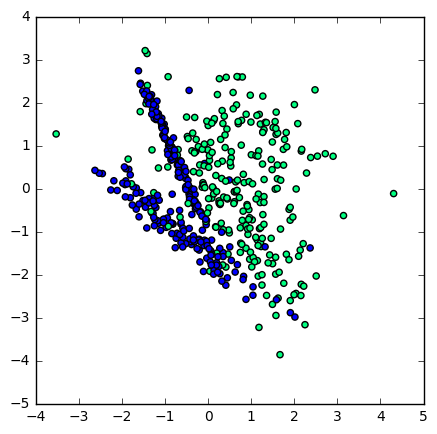

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.show()

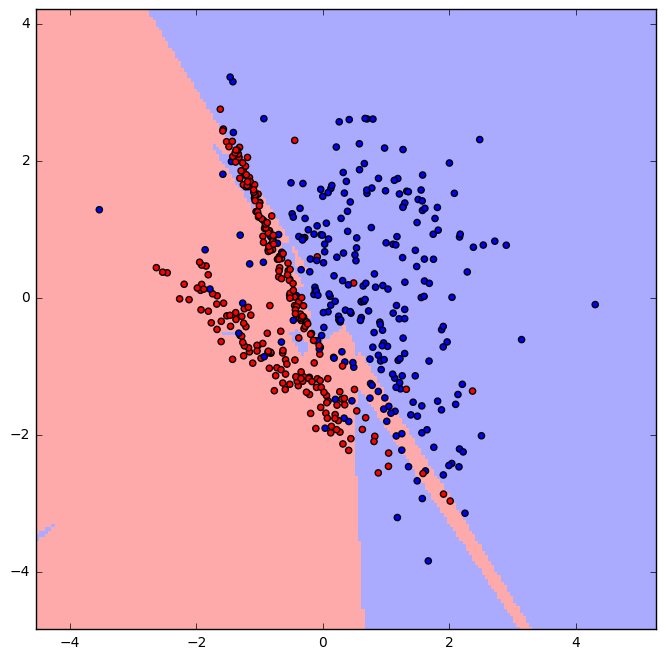

In [28]:
clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), max_depth=max_depth), 
                        10, loss='exp', shrinkage=0.1)
clf.fit(X, y)

plot_surface(X, y, clf)

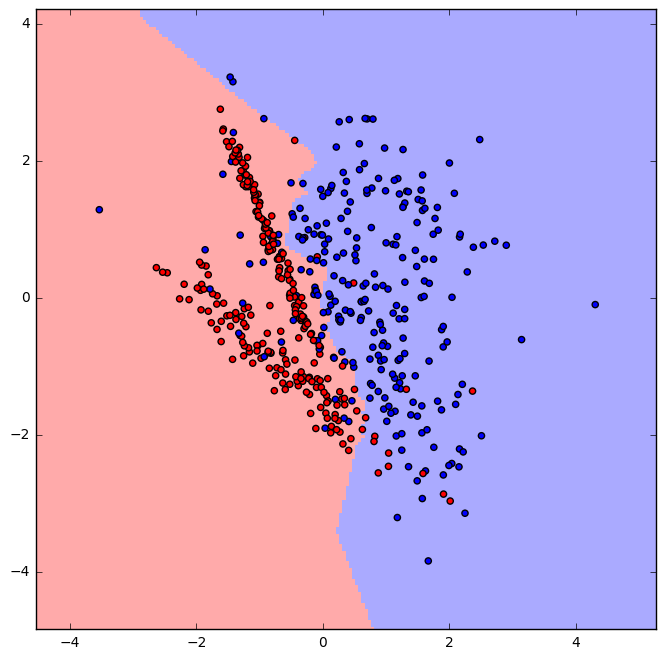

In [25]:
clf = GradBoost(BUTIF(max_leaf=7, 
                      linear_model=LogisticRegression(n_jobs=-1), 
                      task='regression'), 
                10, loss='exp', shrinkage=0.1)
clf.fit(X, y)

plot_surface(X, y, clf)

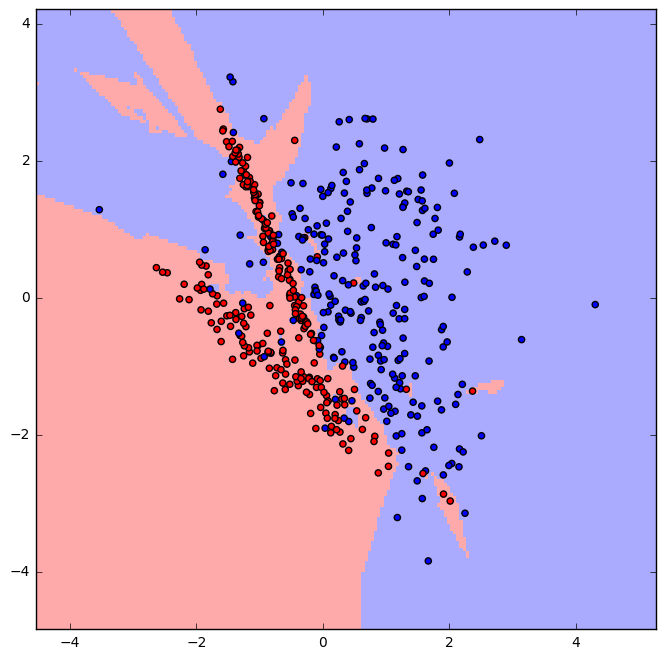

In [26]:
clf = GradBoost(Rand_CART(MSE(), MeanSegmentor()), 
                10, loss='exp', shrinkage=0.1)
clf.fit(X, y)

plot_surface(X, y, clf)

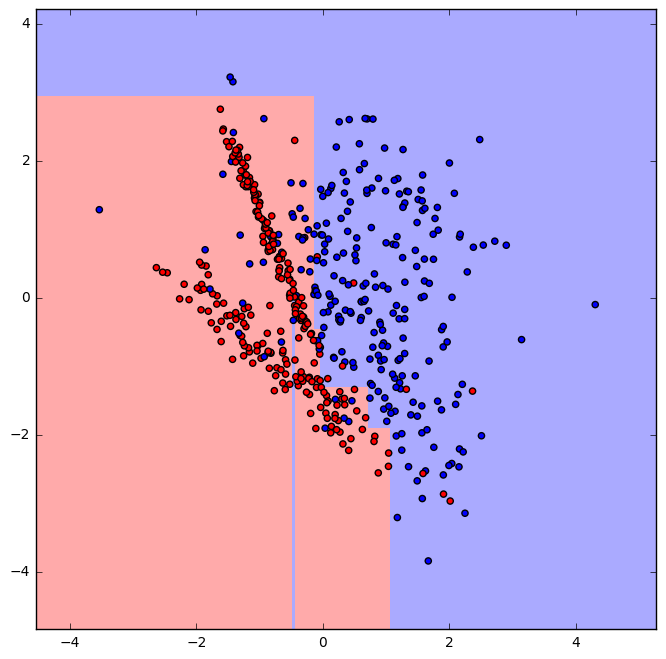

In [27]:
clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=5),
                10, loss='exp', shrinkage=0.1)
clf.fit(X, y)

plot_surface(X, y, clf)

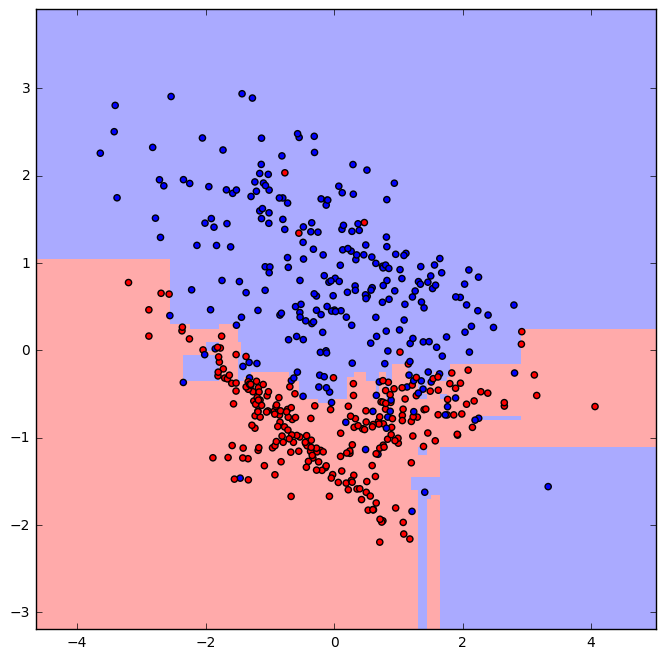

In [28]:
clf = XGBClassifier(n_estimators=200)
clf.fit(X, y)

plot_surface(X, y, clf)

In [57]:
data = datasets['Indian liver']
x_train = data.X_train
y_train = data.Y_train

x_val = data.X_val
y_val = data.Y_val

x_test = data.X_test
y_test = data.Y_test

In [74]:
clf1 = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=2, compare_with_cart=True), 
                                1000, loss='exp', shrinkage=0.1)
clf2 = GradBoost(DecisionTreeRegressor(max_depth=4), 
                                1000, loss='exp', shrinkage=0.1)

In [75]:
clf1.fit(x_train, y_train, X_val=x_val, y_val=y_val, bad_iters_count=10, cross_val=True)
clf2.fit(x_train, y_train, X_val=x_val, y_val=y_val, bad_iters_count=10, cross_val=True)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


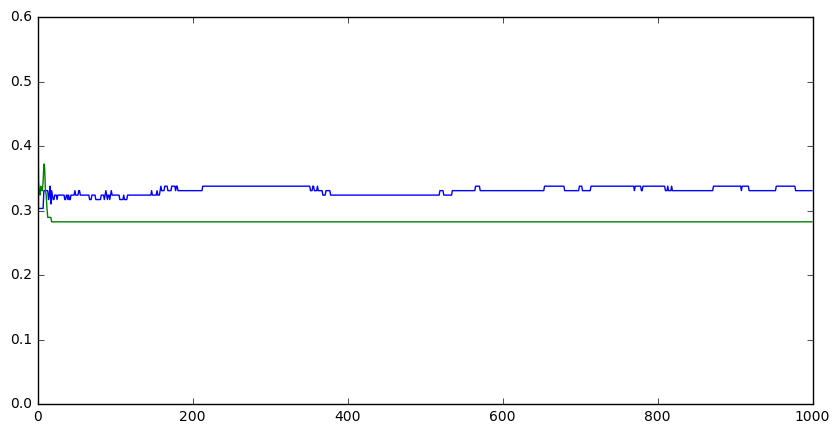

In [76]:
plt.figure(figsize=(10, 5))
plt.ylim(0.0, 0.6)
plt.plot(np.arange(len(clf1.base_learners_after)), clf1.loss_val)
plt.plot(np.arange(len(clf2.base_learners_after)), clf2.loss_val)

## Random CART Boosting

In [100]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 400
    
    max_depths = [3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=2, compare_with_cart=False), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  3 accuracy:  [  0.81283422  22.        ]
max_depth:  5 accuracy:  [  0.81283422  33.        ]
max_depth:  7 accuracy:  [  0.79144385  31.        ]
max_depth:  10 accuracy:  [  0.79679144  23.        ]
max_depth:  12 accuracy:  [  0.79144385  29.        ]
max_depth:  15 accuracy:  [  0.81818182  31.        ]
time:  17.454756999999972


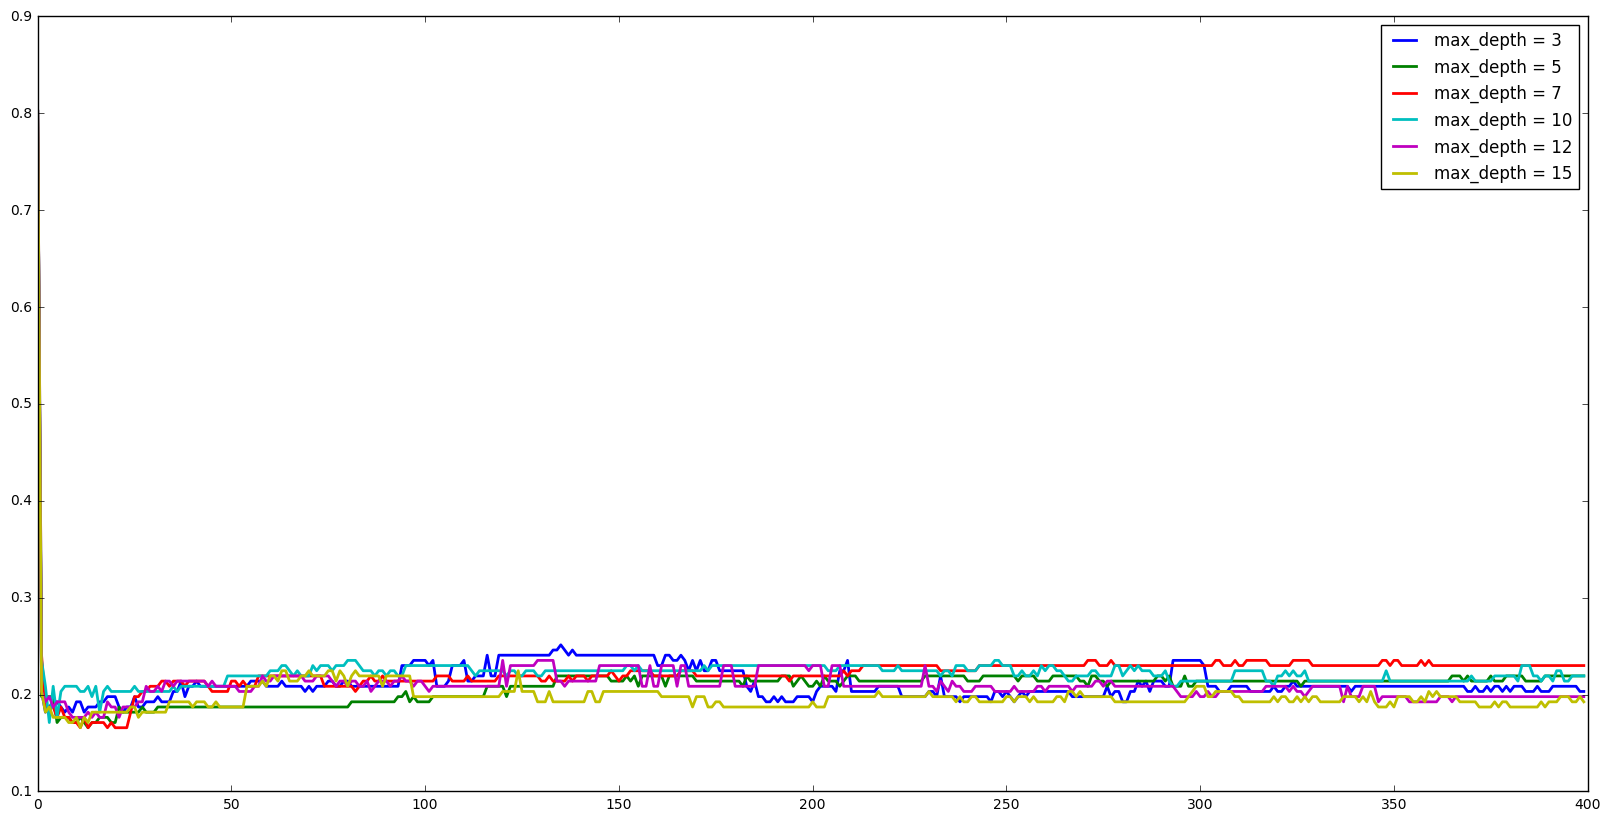

In [101]:
plt.figure(figsize=(20, 10))

plt.plot(np.arange(400), 1 - val_scores[:, 0], 'b', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 1], 'g', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 2], 'r', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 3], 'c', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 4], 'm', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 5], 'y', lw=2)
plt.legend(['max_depth = 3', 'max_depth = 5', 
            'max_depth = 7', 'max_depth = 10', 
            'max_depth = 12', 'max_depth = 15'])

In [102]:
best_scores

array([[  0.81283422,  22.        ],
       [  0.81283422,  33.        ],
       [  0.79144385,  31.        ],
       [  0.79679144,  23.        ],
       [  0.79144385,  29.        ],
       [  0.81818182,  31.        ]])

In [103]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 400
    
    max_depths = [3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(DecisionTreeRegressor(max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  3 accuracy:  [  0.81283422  42.        ]
max_depth:  5 accuracy:  [  0.77540107  22.        ]
max_depth:  7 accuracy:  [  0.78074866  25.        ]
max_depth:  10 accuracy:  [  0.77540107  23.        ]
max_depth:  12 accuracy:  [  0.77540107  21.        ]
max_depth:  15 accuracy:  [  0.79144385  22.        ]
time:  21.961180000000013


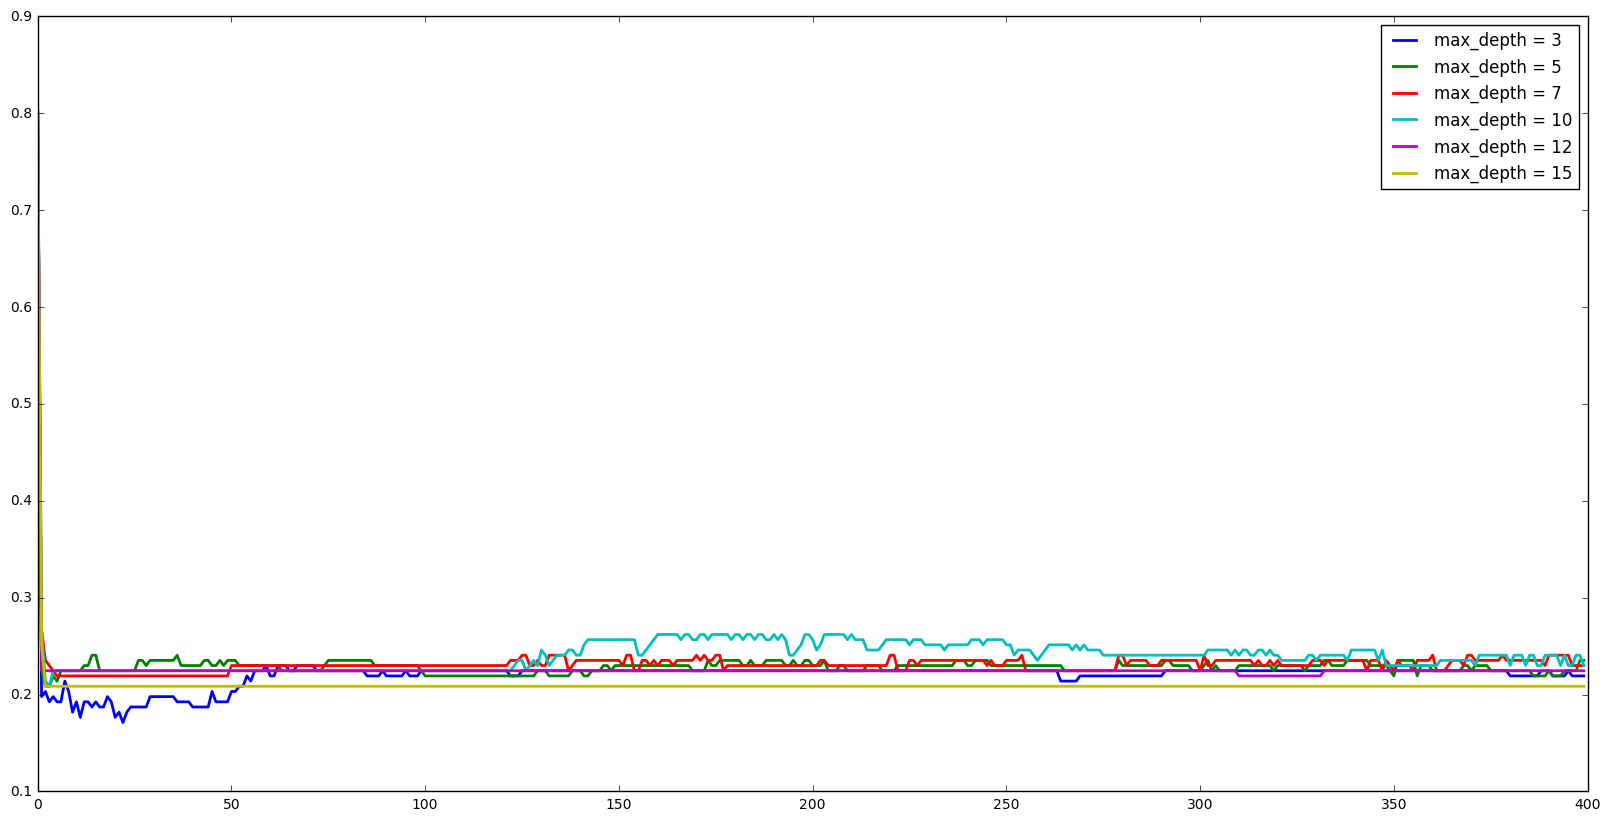

In [104]:
plt.figure(figsize=(20, 10))

plt.plot(np.arange(400), 1 - val_scores[:, 0], 'b', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 1], 'g', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 2], 'r', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 3], 'c', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 4], 'm', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 5], 'y', lw=2)
plt.legend(['max_depth = 3', 'max_depth = 5', 
            'max_depth = 7', 'max_depth = 10',
            'max_depth = 12', 'max_depth = 15'])

In [105]:
best_scores

array([[  0.81283422,  42.        ],
       [  0.77540107,  22.        ],
       [  0.78074866,  25.        ],
       [  0.77540107,  23.        ],
       [  0.77540107,  21.        ],
       [  0.79144385,  22.        ]])

In [109]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 400
    
    max_leaves = [3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_leaf in enumerate(max_leaves):
        clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1, max_iter=50), 
                            task='regression'),
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_leaf: ", max_leaf, 
              "n_estimator: ", best_scores[k, 1],
              "accuracy: ", best_scores[k, 0])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_leaf:  3 n_estimator:  20.0 accuracy:  0.693181818182
max_leaf:  5 n_estimator:  29.0 accuracy:  0.829545454545
max_leaf:  7 n_estimator:  28.0 accuracy:  0.840909090909
max_leaf:  10 n_estimator:  26.0 accuracy:  0.829545454545
max_leaf:  12 n_estimator:  21.0 accuracy:  0.840909090909
max_leaf:  15 n_estimator:  25.0 accuracy:  0.852272727273
time:  789.155559


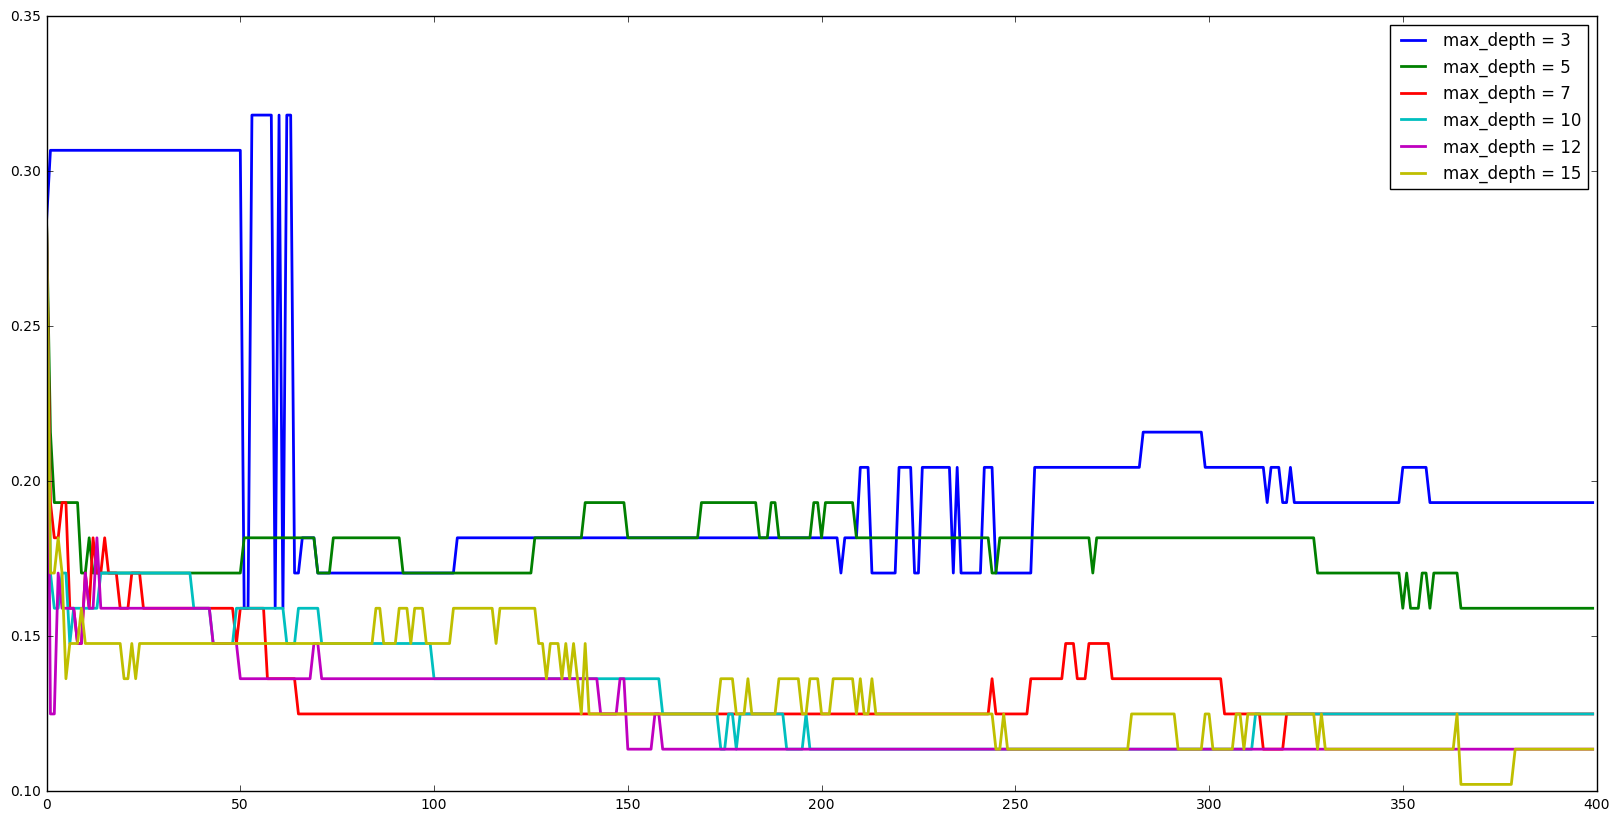

In [110]:
plt.figure(figsize=(20, 10))

plt.plot(np.arange(400), 1 - val_scores[:, 0], 'b', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 1], 'g', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 2], 'r', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 3], 'c', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 4], 'm', lw=2)
plt.plot(np.arange(400), 1 - val_scores[:, 5], 'y', lw=2)
plt.legend(['max_depth = 3', 'max_depth = 5', 
            'max_depth = 7', 'max_depth = 10',
            'max_depth = 12', 'max_depth = 15'])

In [111]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 400
    
    max_depths = [3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(DecisionTreeRegressor(max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  3 accuracy:  [  0.92045455  23.        ]
max_depth:  5 accuracy:  [  0.89772727  21.        ]
max_depth:  7 accuracy:  [  0.89772727  21.        ]
max_depth:  10 accuracy:  [  0.89772727  21.        ]
max_depth:  12 accuracy:  [  0.90909091  21.        ]
max_depth:  15 accuracy:  [  0.88636364  21.        ]
time:  6.245572000000038


In [355]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = np.hstack((data.X_train, np.ones(data.X_train.shape[0])[:, np.newaxis]))
    X_val = np.hstack((data.X_val, np.ones(data.X_val.shape[0])[:, np.newaxis]))
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = np.hstack((data.X_test, np.ones(data.X_test.shape[0])[:, np.newaxis]))
    y_test = data.Y_test    
    n_estimators = 400
    
    max_depths = [3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(Rand_CART(MSE(), MeanSegmentor(), max_depth=max_depth, compare_with_cart=False), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  3 accuracy:  [  0.86363636  41.        ]


KeyboardInterrupt: 

In [184]:
from copy import deepcopy
import numpy as np
from segmentor import MeanSegmentor, MSE

#add usual split procedure for initialize

class ContinuouslyOptimizedObliqueRegressionTree():
    
    def __init__(self, impurity, segmentor, nu=1.0, thau=10, max_iter=100, tol=1e-6, step=0.1):
        self.impurity = impurity
        self.segmentor = segmentor
        self.nu = nu
        self.thau = thau
        self.max_iter = max_iter
        self.tol = tol
        self.step = step
    
    def fit(self, X, y):
        
        X_train = deepcopy(X)
        
        impurity, sr, left_indices, right_indices = self.segmentor(X_train, y, self.impurity)
        
        X_train = np.hstack((X_train, np.ones(X_train.shape[0])[:, np.newaxis]))
        n_objects, n_features = X_train.shape
        
        w_new = np.zeros(n_features)
        w_new[sr[0]] = 1.0
        w_new[-1] = -sr[1]
        theta_left = y[left_indices].mean()
        theta_right = y[right_indices].mean()
        self.l = []
        l_old = np.inf
        l_new = self.objective(w_new, theta_left, theta_right, X_train, y)
        it = 0
        
        while np.abs(l_old - l_new) > self.tol:
            it += 1
            w_old = w_new
            for i in range(self.thau):
                ind_batch = np.random.choice(np.arange(n_objects), size=1)
                X_batch = X_train[ind_batch, :]
                y_batch = y[ind_batch]
                
                s = np.sign((w_old * X_batch).sum())
                
                if -(w_new * X_batch).sum() + (theta_left - y_batch) ** 2 >=\
                    (w_new * X_batch).sum() + (theta_right - y_batch) ** 2:
                    w_new = w_new + self.step * (1 + s) * X_batch
                    theta_left = theta_left - 2 * self.step * (theta_left - y_batch)
                else:
                    w_new = w_new - self.step * (1 - s) * X_batch 
                    theta_right = theta_right - 2 * self.step * (theta_right - y_batch)
                
                if (w_new * w_new).sum() > self.nu:
                    w_new = np.sqrt(self.thau) * w_new / np.linalg.norm(w_new)
            
            l_old = self.objective(w_old, theta_left, theta_right, X_train, y)
            l_new = self.objective(w_new, theta_left, theta_right, X_train, y)
            self.l.append(self.objective(w_new, theta_left, theta_right, X_train, y))
            if it >= self.max_iter:
                break
        
        self.weights = w_new
        self.theta_left = theta_left
        self.theta_right = theta_right
        
    def objective(self, w, theta_left, theta_right, X, y):
        loss = np.vstack((-w.dot(X.T) + (theta_left - y) ** 2,
                   w.dot(X.T) + (theta_right - y) ** 2))
        return (np.max(loss, axis=0) - np.abs(w.dot(X.T))).sum()
    
    def predict(self, X):
        
        X_test = deepcopy(X)
        X_test = np.hstack((X_test, np.ones(X_test.shape[0])[:, np.newaxis]))
        n_objects, n_features = X_test.shape
        y = np.zeros(n_objects)
        mask = (self.weights.dot(X_test.T) >= 0)[0]
        y[mask] = self.theta_right
        y[np.logical_not(mask)] = self.theta_left
        
        return y

In [186]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test  
    n_estimators = 2000
    
    clf1 = GradBoost(ContinuouslyOptimizedObliqueRegressionTree(MSE(), MeanSegmentor(),
                                                                nu=1.0, thau=10, max_iter=10),
                    n_estimators, loss='exp', shrinkage=0.1)
    clf1.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=1000, cross_val=True)
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


time:  11.389549999999872


In [556]:
clf = GradBoost(DecisionTreeRegressor(max_depth=1), 2000, loss='exp')
clf.fit(X_train, y_train)

In [557]:
y_pred = clf.predict(X_val)

In [558]:
accuracy(y_pred, y_val)

0.89772727272727271

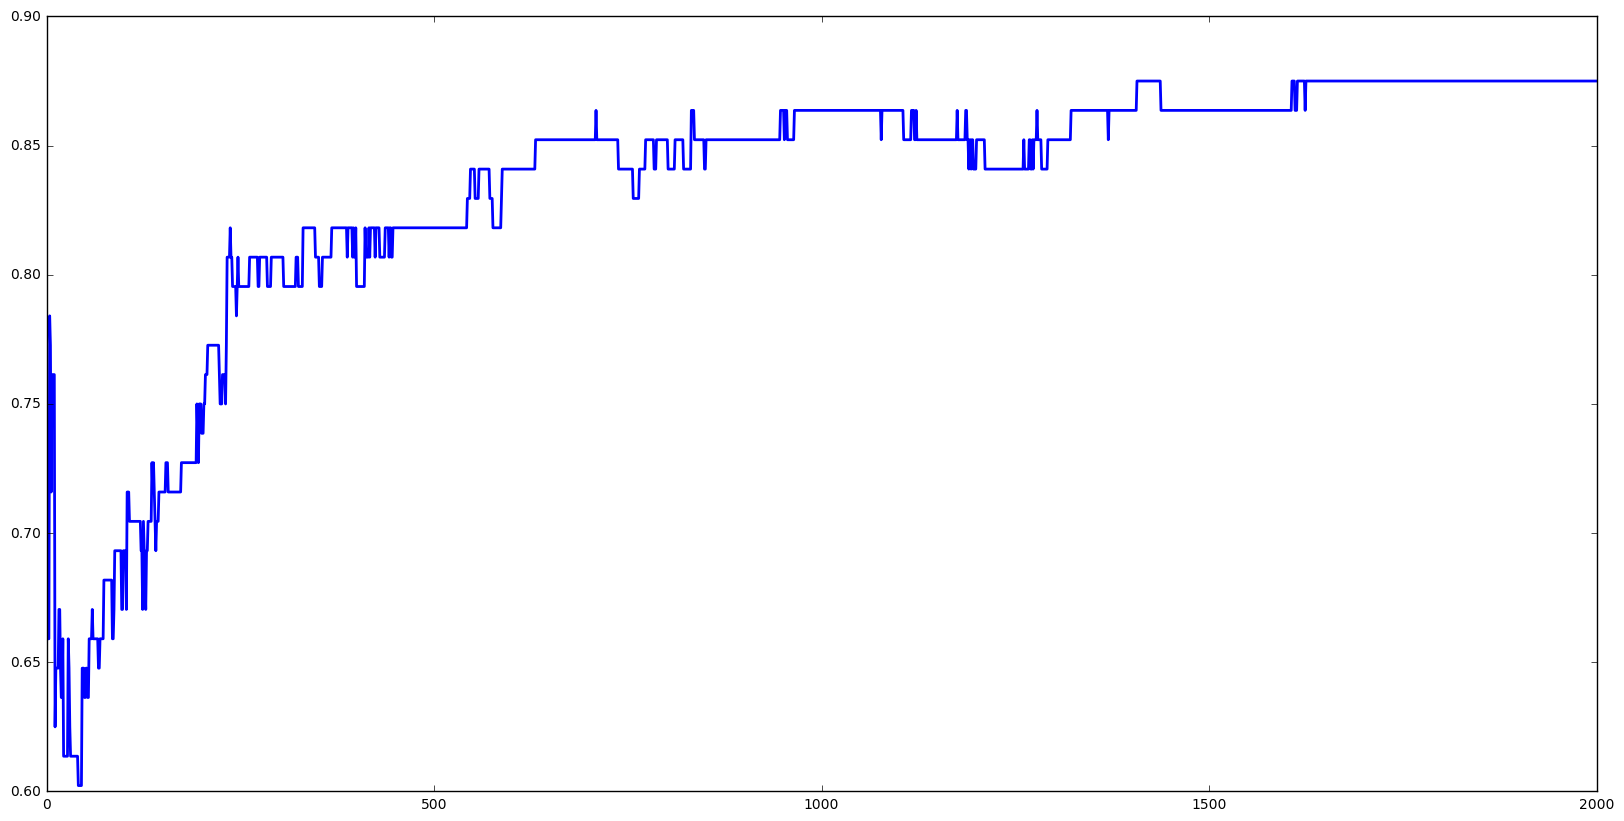

In [580]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(2000), 1 - np.asarray(clf1.loss_val), 'b', lw=2)

In [334]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 2000
    
    max_depths = [1, 3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(DecisionTreeRegressor(max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy:  [  0.94318182  29.        ]
max_depth:  3 accuracy:  [  0.89772727  21.        ]
max_depth:  5 accuracy:  [  0.88636364  21.        ]
max_depth:  7 accuracy:  [  0.89772727  21.        ]
max_depth:  10 accuracy:  [  0.90909091  21.        ]
max_depth:  12 accuracy:  [  0.89772727  21.        ]
max_depth:  15 accuracy:  [  0.86363636  21.        ]
time:  27.05356699999993


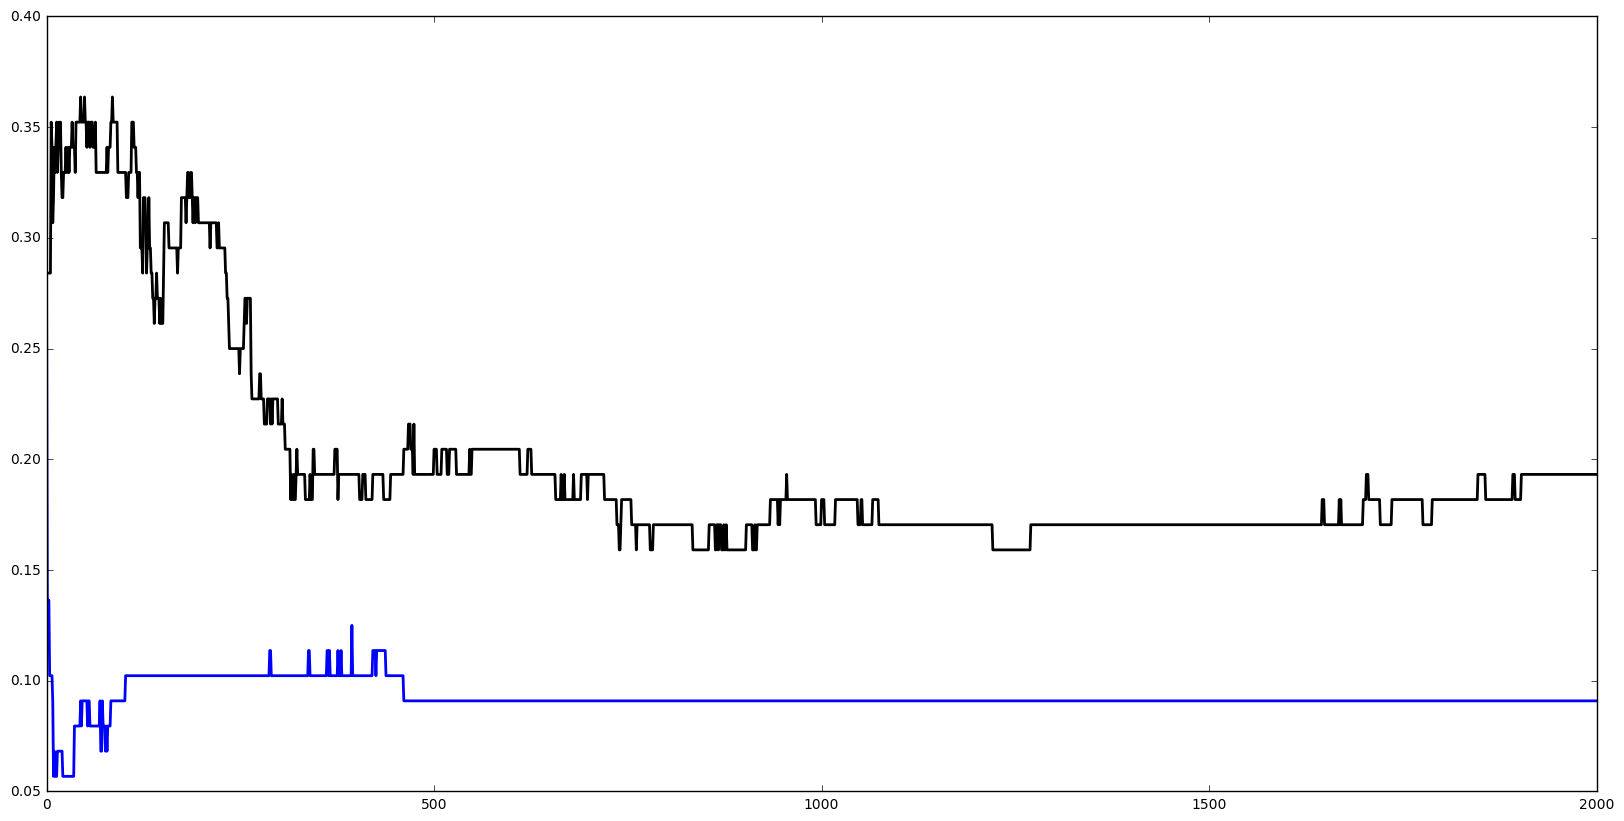

In [336]:
plt.figure(figsize=(20, 10))


plt.plot(np.arange(2000), 1 - val_scores[:, 0], 'b', lw=2)
#plt.plot(np.arange(1000), 1 - val_scores[:, 1], 'g', lw=2)
#plt.plot(np.arange(1000), 1 - val_scores[:, 2], 'r', lw=2)
#plt.plot(np.arange(1000), 1 - val_scores[:, 3], 'c', lw=2)
#plt.plot(np.arange(1000), 1 - val_scores[:, 4], 'm', lw=2)
#plt.plot(np.arange(1000), 1 - val_scores[:, 5], 'y', lw=2)
plt.plot(np.arange(1000), np.asarray(clf1.loss_val), 'k', lw=2)
#plt.legend(['max_depth = 3', 'max_depth = 5', 
#            'max_depth = 7', 'max_depth = 10',
#            'max_depth = 12', 'max_depth = 15', 'CO2'])


In [582]:
from sklearn.linear_model import Ridge

In [596]:
clf1 = Ridge(solver='lsqr')
clf2 = Ridge()

In [597]:
start = clock()
clf1.fit(X, y)
print(clock() - start)

0.0037290000000211876


In [598]:
start = clock()
clf2.fit(X, y)
print(clock() - start)

0.001712000000225089


In [600]:
clf?

In [19]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 100
    
    max_depths = [1, 3, 5, 7, 10, 12, 15]
    
    best_scores = np.zeros((len(max_depths), 2))
    val_scores = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf = GradBoost(HouseHolderCART(MSE(), MeanSegmentor(), method='ridge', alpha=1.0, max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores[:, k] = 1 - np.asarray(clf.loss_val)
        best_scores[k, 0] = val_scores[clf.base_learners_count - 1, k]
        best_scores[k, 1] = clf.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy:  [  0.80213904  21.        ]
max_depth:  3 accuracy:  [  0.80213904  23.        ]
max_depth:  5 accuracy:  [  0.82352941  23.        ]
max_depth:  7 accuracy:  [  0.78609626  23.        ]
max_depth:  10 accuracy:  [  0.80748663  29.        ]
max_depth:  12 accuracy:  [  0.80748663  29.        ]
max_depth:  15 accuracy:  [  0.80748663  29.        ]
time:  93.12689499999999


In [28]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X_train = data.X_train
    X_val = data.X_val
    y_train = data.Y_train.astype('int')
    y_val = data.Y_val.astype('int')
    X_test = data.X_test
    y_test = data.Y_test    
    n_estimators = 100
    
    max_depths = [1, 3, 5, 7, 10, 12, 15]
    
    best_scores2 = np.zeros((len(max_depths), 2))
    val_scores2 = np.zeros((n_estimators, len(max_depths)))
    for k, max_depth in enumerate(max_depths):
        clf2 = GradBoost(DecisionTreeRegressor(max_depth=max_depth), 
                        n_estimators, loss='exp', shrinkage=0.1)
        clf2.fit(X_train, y_train, X_val=X_val, y_val=y_val, bad_iters_count=20, cross_val=True)
        val_scores2[:, k] = 1 - np.asarray(clf2.loss_val)
        best_scores2[k, 0] = val_scores2[clf2.base_learners_count - 1, k]
        best_scores2[k, 1] = clf2.base_learners_count
        print("max_depth: ", max_depth,
              "accuracy: ", best_scores2[k])
    i += 1
    
    print("time: ", clock() - start)

/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:80: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:86: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:
/home/anuar/Рабочий стол/Student/4 kurs/1 sem/Course work/code/gradboost.py:157: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_val != None and y_val != None:


max_depth:  1 accuracy:  [  0.80213904  21.        ]
max_depth:  3 accuracy:  [  0.81283422  42.        ]
max_depth:  5 accuracy:  [  0.75935829  22.        ]
max_depth:  7 accuracy:  [  0.7486631  23.       ]
max_depth:  10 accuracy:  [  0.77005348  23.        ]
max_depth:  12 accuracy:  [  0.78609626  22.        ]
max_depth:  15 accuracy:  [  0.79679144  23.        ]
time:  9.008201999999983


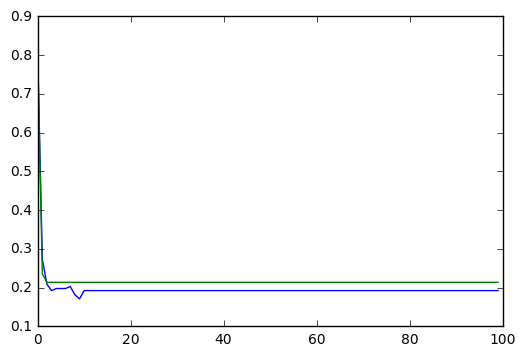

In [35]:
plt.plot(np.arange(100), 1 - val_scores[:, 5])
plt.plot(np.arange(100), 1 - val_scores2[:, 5])